In [86]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [87]:
def step_function(x): #계단함수
    if x < thres:
        return 0
    else:
        return 1

In [88]:
def gen_training_data(data_point):
    x1 = np.random.random(data_point)
    x2 = np.random.random(data_point) #랜덤모듈의 랜덤함수를 구현
    y = ((x1 + x2) > 1).astype(int) #((x1 + x2) > 1) 조건이 맞으면 참 거짓을 뱉고 astype을 사용하면 1과 0으로 변환됌
    training_set = [((x1[i], x2[i]), y[i]) for i in range(len(x1))]

    return training_set

In [89]:
thres = 0.5 #역차
w = np.array([0.3,0.9]) #연결가중치
lr = 0.1 #러닝 데이트 
data_point =100 
epoch = 10 #데이터를 반복적으로 트레인할것이냐
training_set = gen_training_data(data_point)

In [90]:
training_set[0:5]

[((0.5651045671616662, 0.42512835014504013), 0),
 ((0.41591225197861603, 0.9285848381159995), 1),
 ((0.6800834028464918, 0.061472281526013584), 0),
 ((0.0009268455274992204, 0.5153296649559064), 0),
 ((0.8817497299623323, 0.6280339851507452), 1)]

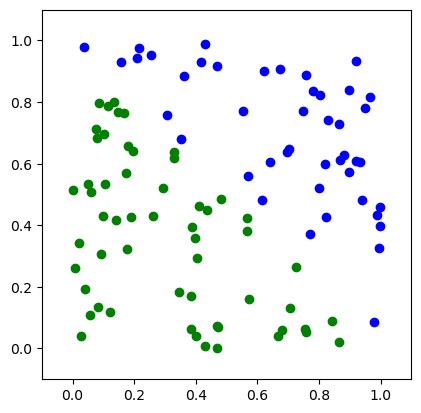

In [91]:
plt.figure(0)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for x,y in training_set:
    if y == 1:
        plt.plot(x[0], x[1], 'bo')
    else:
        plt.plot(x[0], x[1], 'go')
plt.show()

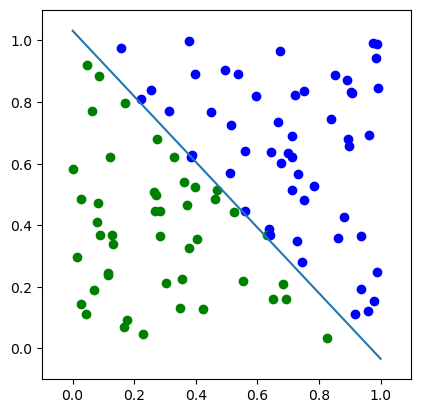

In [55]:
%matplotlib inline
from time import sleep
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
ax =plt.gca()
ax.set_aspect('equal', adjustable='box')

xx = np.linspace(0,1,50)
for i in range(epoch):
    cnt = 0
    for x,y in training_set:
        clear_output(wait=True)
        u = sum(x*w) #입력값*연결강도 값들을 더함 모델의 예측값을 결정함
        prediction = step_function(u) #계단 함수를 사용하여 예측값 결정
        error = y - prediction ## 실제 레이블 y와 예측값 prediction 간의 차이 계산 (오차)
        for index, value in enumerate(x): # enumerate 내장함수는 는 원소의 인덱스와 값을 같이 뽑고싶을때 사용
            w[index] = w[index] + lr*error*value #새 연결강도 = 현 연결강고 + (학습률 * 오차 * 현재입력값)

        for xs, ys in training_set[0:cnt]:
            plt.ylim(-0.1,1.1)
            plt.xlim(-0.1,1.1)
            ax =plt.gca()
            ax.set_aspect('equal', adjustable='box')
        
            if ys == 1:
                # y 값이 1이면 파란색 원 (blue circle)을 플롯
                plt.plot(xs[0], xs[1], 'bo')
            else:
                # y 값이 0이면 초록색 원 (green circle)을 플롯
                plt.plot(xs[0], xs[1], 'go')

        yy = -w[1]/w[0] * xx + thres/w[0]

        plt.plot(xx,yy)
        plt.show()
        cnt=cnt+1
        sleep(0.01)

In [107]:
# 학습 과정
for i in range(epoch):
    for x, y in training_set:
        u = np.dot(x, w)  # 입력값과 가중치의 내적 계산
        prediction = step_function(u)  # 계단 함수를 사용하여 예측값 결정
        error = y - prediction  # 실제 값과 예측값 간의 차이 계산 (오차)
        
        # 가중치 업데이트
        for index, value in enumerate(x):
            w[index] = w[index] + lr * error * value
        
    # 각 에폭의 결과 출력
    print(f"Epoch {i + 1}:")
    print(f"  Weights: {w}")
    print(f"  Training Set Predictions:")

     # 정확도 계산
    correct_predictions = 0
    total_samples = len(training_set)
    
    for x, y in training_set:
        u = np.dot(x, w) # sum(x*w) 이랑 같은기능임 넘파이의 내장함수
        prediction = step_function(u) #활성화함수 
        if prediction == y: #실제값과 활성화함수를 거친 값이 같으면
           correct_predictions += 1 # 카운트를 1올려주고
        print(f"    Input: {x}, Actual: {y}, Prediction: {prediction}, Error: {y - prediction}")
    accuracy = correct_predictions / total_samples #일치해서 올라간 카운트에 전체 개수를 나눠주고
    print(f"Accuracy: {accuracy * 100:.2f}%") # x100을 해서 정확도를 표기한다.
    print("-" * 30)

Epoch 1:
  Weights: [0.48581307 0.50373391]
  Training Set Predictions:
    Input: (0.5651045671616662, 0.42512835014504013), Actual: 0, Prediction: 0, Error: 0
    Input: (0.41591225197861603, 0.9285848381159995), Actual: 1, Prediction: 1, Error: 0
    Input: (0.6800834028464918, 0.061472281526013584), Actual: 0, Prediction: 0, Error: 0
    Input: (0.0009268455274992204, 0.5153296649559064), Actual: 0, Prediction: 0, Error: 0
    Input: (0.8817497299623323, 0.6280339851507452), Actual: 1, Prediction: 1, Error: 0
    Input: (0.39841554609267005, 0.35999568256307757), Actual: 0, Prediction: 0, Error: 0
    Input: (0.4030554802601939, 0.2932667863749122), Actual: 0, Prediction: 0, Error: 0
    Input: (0.5698505745504361, 0.5591700247580248), Actual: 1, Prediction: 1, Error: 0
    Input: (0.7799089122793825, 0.8370294656136171), Actual: 1, Prediction: 1, Error: 0
    Input: (0.4098393873797388, 0.46162493943517113), Actual: 0, Prediction: 0, Error: 0
    Input: (0.9897681895195242, 0.4325